In [7]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from socket import gethostname

sns.set(style="white")
sns.set_context("notebook")

SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

tick_setup = {'labelsize' : SMALL_SIZE,
              'major.pad': 0}

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', **tick_setup)    # fontsize of the tick labels
plt.rc('ytick', **tick_setup)
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

hostname = gethostname().split('.')[0]
if hostname == 'Pluripa':
    home_dir = "/Users/weinberz/"
    box_dir = "/Users/weinberz/Box Sync/"
else:
    home_dir = "/Volumes/Coatamer/Users/weinberz/"
    box_dir = "/Volumes/Coatamer/Users/weinberz/Box/"

In [3]:
outputdir = home_dir+"Google Drive/HES Lab/SARSNotch/SARSNotch Manuscript/jupyter_out/"

In [4]:
df = pd.read_csv(box_dir + 'BadIdea/Luminescence/20210210.csv')
df.loc[df['CellLine'] == 'LCB1-Notch', 'CellLine'] = 'SARSNotch'

In [8]:
def norm_to_control(df):
    group_means = df.groupby('Condition')['Counts'].mean().reset_index()
    max_response = np.sqrt(group_means[group_means.Condition == 'VSVG']['Counts'].values[0])
    df['Counts'] = np.sqrt(df['Counts'])/max_response
    return df

df['norm_counts'] = df.groupby('CellLine')['Condition','Counts'].apply(norm_to_control).reset_index()['Counts']

<ipython-input-8-a45e3933d629>:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df['norm_counts'] = df.groupby('CellLine')['Condition','Counts'].apply(norm_to_control).reset_index()['Counts']


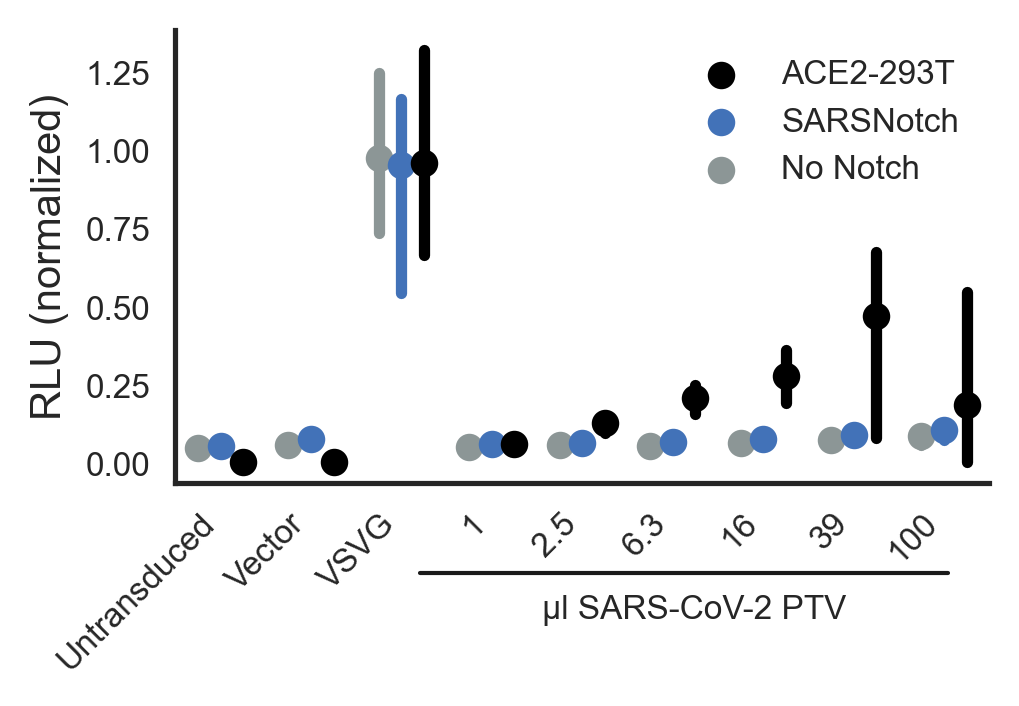

In [12]:
with sns.color_palette(['#8C9696','#4272B8', 'black']):
    fig, ax = plt.subplots(1,1,figsize=(3.5,2), dpi=300)
    g = sns.pointplot(data=df, x='Condition', y='norm_counts', hue='CellLine',
                      hue_order=['No Notch','SARSNotch','ACE2-293T'], 
                      order=['Untransduced', 'Vector', 'VSVG', '1','2.5', '6.3', '16','39','100'],
                      join=False, scale=0.75, dodge=0.5)
    g.set_xlabel('')
    g.legend().remove()
    order = [2, 1, 0]
    handles, labels = ax.get_legend_handles_labels()
    plt.legend([handles[idx] for idx in order],
           [labels[idx] for idx in order],
           frameon=False, loc='upper right',)
    g.set_ylabel('RLU (normalized)')
    line = mpl.lines.Line2D([0.3, 0.95],[-.2, -.2], 
                        lw=1, color='k', clip_on=False, 
                        transform=g.axes.transAxes)
    g.axes.add_line(line)
    g.axes.text(0.45, -.3, 'µl SARS-CoV-2 PTV', 
                clip_on=False, transform=g.axes.transAxes)
    plt.xticks(rotation=45, ha='right')
    sns.despine()
    plt.savefig(outputdir + 'normalized_luminescence_24.svg', bbox_inches='tight')

<ipython-input-13-ed4f0a44e507>:16: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim([-500, 1e10])


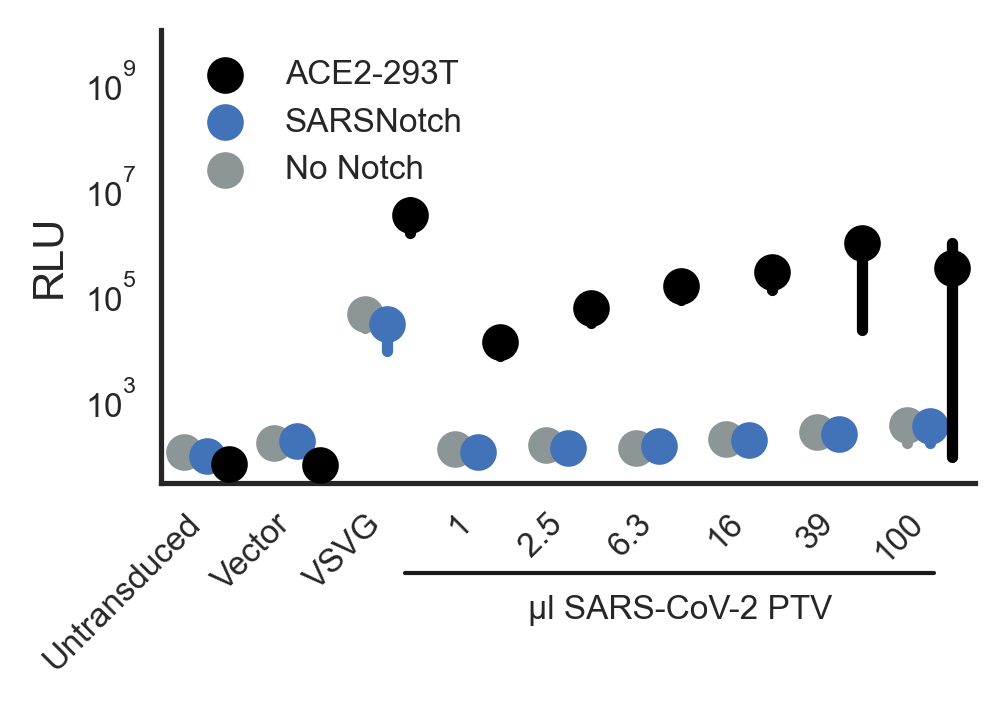

In [13]:
with sns.color_palette(['#8C9696','#4272B8', 'black']):
    fig, ax = plt.subplots(1,1,figsize=(3.5,2), dpi=300)
    g = sns.pointplot(data=df, x='Condition', y='Counts', hue='CellLine',
                      hue_order = ['No Notch', 'SARSNotch', 'ACE2-293T'], 
                      order=['Untransduced', 'Vector', 'VSVG', '1','2.5', '6.3', '16','39','100'],
                      join=False, dodge=0.5)
    g.legend().remove()
    handles, labels = ax.get_legend_handles_labels()
    plt.legend([handles[idx] for idx in order],
           [labels[idx] for idx in order],
           frameon=False, loc='upper left',)
    g.set_xlabel('')
    g.set_ylabel('RLU')
    plt.xticks(rotation=45, ha='right')
    plt.yscale('log',)
    plt.ylim([-500, 1e10])
    line = mpl.lines.Line2D([0.3, 0.95],[-.2, -.2], 
                        lw=1, color='k', clip_on=False, 
                        transform=g.axes.transAxes)
    g.axes.add_line(line)
    g.axes.text(0.45, -.3, 'µl SARS-CoV-2 PTV', 
                clip_on=False, transform=g.axes.transAxes)
    sns.despine()
    plt.savefig(outputdir+'raw_lumi_sarsnotch_24.svg', bbox_inches='tight')